In [82]:
!pip install pyzbar
!apt-get install libzbar0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libzbar0 is already the newest version (0.23.92-4build2).
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.


In [83]:
from google.colab import output
from google.colab.output import eval_js
import numpy as np
import cv2
from PIL import Image
import io, base64

def take_photo():
    js = """
    async function takePhoto() {
      const video = document.createElement('video');
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();
      await new Promise(resolve => requestAnimationFrame(resolve));

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getVideoTracks()[0].stop();
      video.remove();
      return canvas.toDataURL('image/png');
    }
    takePhoto();
    """
    data = eval_js(js)
    image_bytes = base64.b64decode(data.split(",")[1])
    img = Image.open(io.BytesIO(image_bytes))
    return np.array(img)

📸 Show your QR code or barcode...
✅ Code Detected!

Type: EAN13
Data: 6281007120401

🔎 Searching for product info...

📦 Product Information:
Name: Almarai fresh Milk
Brand: المراعي,Almarai
Categories: Dairies, Milks
Image URL: https://images.openfoodfacts.org/images/products/628/100/712/0401/front_en.26.400.jpg
Ingredients: Full fat milk.
May contain sodium fluoride.

🍏 Nutrition:
 - added-sugars: 0
 - added-sugars_100g: 0
 - added-sugars_serving: 0
 - added-sugars_unit: g
 - added-sugars_value: 0
 - calcium: 0.25
 - calcium_100g: 0.1
 - calcium_serving: 0.25
 - calcium_unit: g
 - calcium_value: 0.25
 - carbohydrates: 12
 - carbohydrates_100g: 4.8
 - carbohydrates_serving: 12
 - carbohydrates_unit: g
 - carbohydrates_value: 12
 - cholesterol: 0.0238
 - cholesterol_100g: 0.00952
 - cholesterol_serving: 0.0238
 - cholesterol_unit: g
 - cholesterol_value: 0.0238
 - energy: 636
 - energy-kcal: 152
 - energy-kcal_100g: 60.8
 - energy-kcal_serving: 152
 - energy-kcal_unit: kcal
 - energy-kca

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

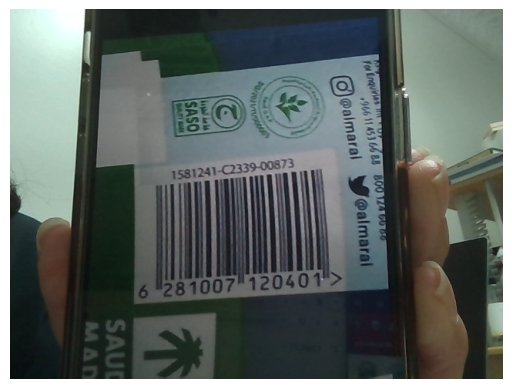

In [92]:
from pyzbar.pyzbar import decode
import cv2
import requests
import matplotlib.pyplot as plt

# ---- API FUNCTION ----
def get_product_info(barcode_number):
    url = f"https://world.openfoodfacts.org/api/v0/product/{barcode_number}.json"
    try:
        response = requests.get(url)
        data = response.json()

        if data["status"] == 1:
            product = data["product"]
            return {
                "name": product.get("product_name", "Unknown"),
                "brand": product.get("brands", "Unknown"),
                "categories": product.get("categories", "Unknown"),
                "image": product.get("image_url", "No image"),
                "ingredients": product.get("ingredients_text", "Not available"),
                "nutrients": product.get("nutriments", {})
            }
        else:
            return None
    except:
        return None


print("📸 Show your QR code or barcode...")
img = take_photo()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
decoded = decode(gray)

if decoded:
    print("✅ Code Detected!\n")

    for obj in decoded:
        code_type = obj.type
        code_data = obj.data.decode("utf-8")

        print("Type:", code_type)
        print("Data:", code_data)

        # --------------- QR CODE ----------------
        if code_type == "QRCODE":
            print("\n📌 QR Code Content:")
            print(code_data)

        # --------------- BARCODE ----------------
        else:
            print("\n🔎 Searching for product info...")
            product = get_product_info(code_data)

            if product:
                print("\n📦 Product Information:")
                print("Name:", product["name"])
                print("Brand:", product["brand"])
                print("Categories:", product["categories"])
                print("Image URL:", product["image"])
                print("Ingredients:", product["ingredients"])

                # nutrition
                nutrients = product["nutrients"]
                if nutrients:
                    print("\n🍏 Nutrition:")
                    for k, v in nutrients.items():
                        print(f" - {k}: {v}")
            else:
                print("❌ Product not found in OpenFoodFacts.")

else:
    print("❌ No QR or Barcode found.")

# Show the captured image
plt.imshow(img)
plt.axis("off")